In [1]:
#importando as bibliotecas necessárias
import geoplot as gplt
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#importando o csv
df=pd.read_csv("C:\\Users\\018118631\\MentoriaBB\\Dados Tabulares\\world-data-2023.csv", encoding='latin-1')

In [3]:
#Conferir se os dados foram importados
pd.set_option('display.max_columns', None)
df.head()

Country Density(P/Km2) Abbreviation Agricultural Land( %)  \
0  Afghanistan             60           AF                58.10%   
1      Albania            105           AL                43.10%   
2      Algeria             18           DZ                17.40%   
3      Andorra            164           AD                40.00%   
4       Angola             26           AO                47.50%   

  Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0        652,230           323,000       32.49          93.0   
1         28,748             9,000       11.78         355.0   
2      2,381,741           317,000       24.28         213.0   
3            468               NaN        7.20         376.0   
4      1,246,700           117,000       40.73         244.0   

  Capital/Major City Co2-Emissions     CPI CPI Change (%) Currency-Code  \
0              Kabul         8,672   149.9          2.30%           AFN   
1             Tirana         4,536  119.05          1.40%           ALL   
2            Algiers       150,006  151.36          2.00%           DZD   
3   Andorra la Vella           469     NaN            NaN           EUR   
4             Luanda        34,693  261.73         17.10%           AOA   

   Fertility Rate Forested Area (%) Gasoline Price                GDP  \
0            4.47             2.10%         $0.70    $19,101,353,833    
1            1.62            28.10%         $1.36    $15,278,077,447    
2            3.02             0.80%         $0.28   $169,988,236,398    
3            1.27            34.00%         $1.51     $3,154,057,987    
4            5.52            46.30%         $0.97    $94,635,415,870    

  Gross primary education enrollment (%)  \
0                                104.00%   
1                                107.00%   
2                                109.90%   
3                                106.40%   
4                                113.50%   

  Gross tertiary education enrollment (%)  Infant mortality      Largest city  \
0                                   9.70%              47.9             Kabul   
1                                  55.00%               7.8            Tirana   
2                                  51.40%              20.1           Algiers   
3                                     NaN               2.7  Andorra la Vella   
4                                   9.30%              51.6            Luanda   

   Life expectancy  Maternal mortality ratio Minimum wage Official language  \
0             64.5                     638.0       $0.43             Pashto   
1             78.5                      15.0       $1.12           Albanian   
2             76.7                     112.0       $0.95             Arabic   
3              NaN                       NaN       $6.63            Catalan   
4             60.8                     241.0       $0.71         Portuguese   

  Out of pocket health expenditure  Physicians per thousand  Population  \
0                           78.40%                     0.28  38,041,754   
1                           56.90%                     1.20   2,854,191   
2                           28.10%                     1.72  43,053,054   
3                           36.40%                     3.33      77,142   
4                           33.40%                     0.21  31,825,295   

  Population: Labor force participation (%) Tax revenue (%) Total tax rate  \
0                                    48.90%           9.30%         71.40%   
1                                    55.70%          18.60%         36.60%   
2                                    41.20%          37.20%         66.10%   
3                                       NaN             NaN            NaN   
4                                    77.50%           9.20%         49.10%   

  Unemployment rate Urban_population   Latitude  Longitude  
0            11.12%        9,797,273  33.939110  67.709953  
1            12.33%        1,747,593  41.153332  20.16

In [4]:
# Contagem de dados para verificar valores faltantes
df.count()

Country                                      195
Density(P/Km2)                               195
Abbreviation                                 188
Agricultural Land( %)                        188
Land Area(Km2)                               194
Armed Forces size                            171
Birth Rate                                   189
Calling Code                                 194
Capital/Major City                           192
Co2-Emissions                                188
CPI                                          178
CPI Change (%)                               179
Currency-Code                                180
Fertility Rate                               188
Forested Area (%)                            188
Gasoline Price                               175
GDP                                          193
Gross primary education enrollment (%)       188
Gross tertiary education enrollment (%)      183
Infant mortality                             189
Largest city        

Observa-se que existem muitos valores faltantes

In [5]:
# Obter quantos dados realmente estão faltando em cada coluna do dataset
df.isna().sum(), df.isna().sum()

#valores vazios tem significado?

(Country                                       0
 Density(P/Km2)                                0
 Abbreviation                                  7
 Agricultural Land( %)                         7
 Land Area(Km2)                                1
 Armed Forces size                            24
 Birth Rate                                    6
 Calling Code                                  1
 Capital/Major City                            3
 Co2-Emissions                                 7
 CPI                                          17
 CPI Change (%)                               16
 Currency-Code                                15
 Fertility Rate                                7
 Forested Area (%)                             7
 Gasoline Price                               20
 GDP                                           2
 Gross primary education enrollment (%)        7
 Gross tertiary education enrollment (%)      12
 Infant mortality                              6
 Largest city       

In [6]:
# Obter métricas estatísticas interessantes a partir das colunas numéricas: 
df.describe()

Birth Rate  Calling Code  Fertility Rate  Infant mortality  \
count  189.000000    194.000000      188.000000        189.000000   
mean    20.214974    360.546392        2.698138         21.332804   
std      9.945774    323.236419        1.282267         19.548058   
min      5.900000      1.000000        0.980000          1.400000   
25%     11.300000     82.500000        1.705000          6.000000   
50%     17.950000    255.500000        2.245000         14.000000   
75%     28.750000    506.750000        3.597500         32.700000   
max     46.080000   1876.000000        6.910000         84.500000   

       Life expectancy  Maternal mortality ratio  Physicians per thousand  \
count       187.000000                181.000000               188.000000   
mean         72.279679                160.392265                 1.839840   
std           7.483661                233.502024                 1.684261   
min          52.800000                  2.000000                 0.010000   
25%          67.000000                 13.000000                 0.332500   
50%          73.200000                 53.000000                 1.460000   
75%          77.500000                186.000000                 2.935000   
max          85.400000               1150.000000                 8.420000   

         Latitude   Longitude  
count  194.000000  194.000000  
mean    19.092351   20.232434  
std     23.961779   66.716110  
min    -40.900557 -175.198242  
25%      4.544175   -7.941496  
50%     17.273849   20.972652  
75%     40.124603   48.281523  
max     64.963051  178.065032

Percebe-se que talvez colunas que tenham valores numéricos não estejam sendo interpretados como tal.

In [7]:
# Conferir os tipos de cada coluna
print(df.dtypes)

Country                                       object
Density(P/Km2)                                object
Abbreviation                                  object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       

Percebe-se que colunas obviamente numéricas como os percentuais e o preço da gasolina, por exemplo, estão sendo interpretados como Object devido a caracteres como $, % e "," presentes nos valores. Dessa forma, será necessário "limpar" esses dados para analisar o conteúdo do dataset de forma eficiente.

In [8]:
# Selecionar colunas numéricas sem "%"
numerico = {"Density(P/Km2)", 'Land Area(Km2)', 'Armed Forces size',
            'Co2-Emissions', 'CPI', 'Gasoline Price', 'GDP', 'Minimum wage',
            'Population', 'Urban_population'}

# Para cada coluna selecionada, retirar caracteres causadores de problema e converter tipo para float
for column in numerico:
    df[column] = df[column].str.replace(",", "")
    df[column] = df[column].str.replace("$", "")
    df[column] = df[column].dropna().astype(float)


In [9]:
# Selecionar colunas numéricas que representem valores percentuais
percentuais = {'Agricultural Land( %)', 'CPI Change (%)', 'Forested Area (%)',
               'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)',
               'Out of pocket health expenditure', 'Population: Labor force participation (%)',
               'Tax revenue (%)', 'Total tax rate', 'Unemployment rate'}

# Para cada coluna selecionada, retirar o simbolo da porcentagem, converter para float e dividir por 100.
for columnp in percentuais:
    df[columnp] = df[columnp].str.replace("%", "")
    df[columnp] = df[columnp].dropna().astype(float)
    df[columnp] = df[columnp]/100


In [10]:
# Configurar o notebook para mostrar o máximo de colunas
pd.set_option('display.max_columns', None)

# Conferir se os simbolos foram retirados
df.head()

Country  Density(P/Km2) Abbreviation  Agricultural Land( %)  \
0  Afghanistan            60.0           AF                  0.581   
1      Albania           105.0           AL                  0.431   
2      Algeria            18.0           DZ                  0.174   
3      Andorra           164.0           AD                  0.400   
4       Angola            26.0           AO                  0.475   

   Land Area(Km2)  Armed Forces size  Birth Rate  Calling Code  \
0        652230.0           323000.0       32.49          93.0   
1         28748.0             9000.0       11.78         355.0   
2       2381741.0           317000.0       24.28         213.0   
3           468.0                NaN        7.20         376.0   
4       1246700.0           117000.0       40.73         244.0   

  Capital/Major City  Co2-Emissions     CPI  CPI Change (%) Currency-Code  \
0              Kabul         8672.0  149.90           0.023           AFN   
1             Tirana         4536.0  119.05           0.014           ALL   
2            Algiers       150006.0  151.36           0.020           DZD   
3   Andorra la Vella          469.0     NaN             NaN           EUR   
4             Luanda        34693.0  261.73           0.171           AOA   

   Fertility Rate  Forested Area (%)  Gasoline Price           GDP  \
0            4.47              0.021            0.70  1.910135e+10   
1            1.62              0.281            1.36  1.527808e+10   
2            3.02              0.008            0.28  1.699882e+11   
3            1.27              0.340            1.51  3.154058e+09   
4            5.52              0.463            0.97  9.463542e+10   

   Gross primary education enrollment (%)  \
0                                   1.040   
1                                   1.070   
2                                   1.099   
3                                   1.064   
4                                   1.135   

   Gross tertiary education enrollment (%)  Infant mortality  \
0                                    0.097              47.9   
1                                    0.550               7.8   
2                                    0.514              20.1   
3                                      NaN               2.7   
4                                    0.093              51.6   

       Largest city  Life expectancy  Maternal mortality ratio  Minimum wage  \
0             Kabul             64.5                     638.0          0.43   
1            Tirana             78.5                      15.0          1.12   
2           Algiers             76.7                     112.0          0.95   
3  Andorra la Vella              NaN                       NaN          6.63   
4            Luanda             60.8                     241.0          0.71   

  Official language  Out of pocket health expenditure  \
0            Pashto                             0.784   
1          Albanian                             0.569   
2            Arabic                             0.281   
3           Catalan                             0.364   
4        Portuguese                             0.334   

   Physicians per thousand  Population  \
0                     0.28  38041754.0   
1                     1.20   2854191.0   
2                     1.72  43053054.0   
3                     3.33     77142.0   
4                     0.21  31825295.0   

   Population: Labor force participation (%)  Tax revenue (%)  Total tax rate  \
0                                      0.489            0.093           0.714   
1                                      0.557            0.186           0.366   
2                                      0.412            0.372           0.661   
3                                        NaN              NaN             NaN   
4                                      0.775            0.092           0.491   

   Unemployment rate  Urban_population   Latitude  Longitude  
0             0.1112  

In [11]:
# Conferir se os tipos dos dados agora estão condizentes com o esperado
print(df.dtypes)

Country                                       object
Density(P/Km2)                               float64
Abbreviation                                  object
Agricultural Land( %)                        float64
Land Area(Km2)                               float64
Armed Forces size                            float64
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                float64
CPI                                          float64
CPI Change (%)                               float64
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                            float64
Gasoline Price                               float64
GDP                                          float64
Gross primary education enrollment (%)       float64
Gross tertiary education enrollment (%)      f

In [12]:
# Agora sim, descrição de todas as métricas numéricas
df.describe()

Density(P/Km2)  Agricultural Land( %)  Land Area(Km2)  \
count      195.000000             188.000000    1.940000e+02   
mean       356.764103               0.391176    6.896244e+05   
std       1982.888967               0.217831    1.921609e+06   
min          2.000000               0.006000    0.000000e+00   
25%         35.500000               0.217000    2.382825e+04   
50%         89.000000               0.396000    1.195110e+05   
75%        216.500000               0.553750    5.242560e+05   
max      26337.000000               0.826000    1.709824e+07   

       Armed Forces size  Birth Rate  Calling Code  Co2-Emissions  \
count       1.710000e+02  189.000000    194.000000   1.880000e+02   
mean        1.592749e+05   20.214974    360.546392   1.777992e+05   
std         3.806288e+05    9.945774    323.236419   8.387903e+05   
min         0.000000e+00    5.900000      1.000000   1.100000e+01   
25%         1.100000e+04   11.300000     82.500000   2.304250e+03   
50%         3.100000e+04   17.950000    255.500000   1.230300e+04   
75%         1.420000e+05   28.750000    506.750000   6.388425e+04   
max         3.031000e+06   46.080000   1876.000000   9.893038e+06   

               CPI  CPI Change (%)  Fertility Rate  Forested Area (%)  \
count   178.000000      179.000000      188.000000         188.000000   
mean    190.460955        0.067223        2.698138           0.320154   
std     397.947380        0.244504        1.282267           0.237913   
min      99.030000       -0.043000        0.980000           0.000000   
25%     113.885000        0.010000        1.705000           0.110000   
50%     125.340000        0.023000        2.245000           0.320000   
75%     157.265000        0.042500        3.597500           0.481750   
max    4583.710000        2.549000        6.910000           0.983000   

       Gasoline Price           GDP  Gross primary education enrollment (%)  \
count      175.000000  1.930000e+02                              188.000000   
mean         1.002457  4.772959e+11                                1.024702   
std          0.368858  2.172173e+12                                0.131516   
min          0.000000  4.727146e+07                                0.234000   
25%          0.755000  8.454620e+09                                0.989500   
50%          0.980000  3.438723e+10                                1.025500   
75%          1.240000  2.340940e+11                                1.080250   
max          2.000000  2.142770e+13                                1.425000   

       Gross tertiary education enrollment (%)  Infant mortality  \
count                               183.000000        189.000000   
mean                                  0.379634         21.332804   
std                                   0.292610         19.548058   
min                                   0.008000          1.400000   
25%                                   0.121500          6.000000   
50%                                   0.312000         14.000000   
75%                                   0.631500         32.700000   
max                                   1.366000         84.500000   

       Life expectancy  Maternal mortality ratio  Minimum wage  \
count       187.000000                181.000000    150.000000   
mean         72.279679                160.392265      2.194133   
std           7.483661                233.502024      2.970796   
min          52.800000                  2.000000      0.010000   
25%          67.000000                 13.000000      0.402500   
50%          73.200000                 53.000000      1.045000   
75%          77.500000                186.000000      2.447500   
max          85.400000               1150.000000     13.590000   

       Out of pocket health expenditure  Physicians per thousand  \
count                        188.000000               188.000000   
mean                           0.326372                 1.839840   
std                       

Existem colunas percentuais com valores muito maiores do que 100% é preciso checar se isso faz sentido.

In [13]:
# Checar valores percentuais maiores que 100%
for nome_coluna in percentuais:
    for indice, valor in enumerate(df[nome_coluna]):
        if valor >= 1.0:
            nome_pais = df.loc[indice, 'Country']
            print(f"{nome_pais} | {nome_coluna} | {valor}")

South Sudan | CPI Change (%) | 1.879
Venezuela | CPI Change (%) | 2.549
Afghanistan | Gross primary education enrollment (%) | 1.04
Albania | Gross primary education enrollment (%) | 1.07
Algeria | Gross primary education enrollment (%) | 1.099
Andorra | Gross primary education enrollment (%) | 1.064
Angola | Gross primary education enrollment (%) | 1.135
Antigua and Barbuda | Gross primary education enrollment (%) | 1.05
Argentina | Gross primary education enrollment (%) | 1.097
Australia | Gross primary education enrollment (%) | 1.003
Austria | Gross primary education enrollment (%) | 1.031
Bangladesh | Gross primary education enrollment (%) | 1.165
Belarus | Gross primary education enrollment (%) | 1.005
Belgium | Gross primary education enrollment (%) | 1.0390000000000001
Belize | Gross primary education enrollment (%) | 1.117
Benin | Gross primary education enrollment (%) | 1.22
Bhutan | Gross primary education enrollment (%) | 1.001
Botswana | Gross primary education enrollment 

“Gross” enrollment includes students of all ages, including students whose age is different from the official age group. When there is late enrollment, early enrollment, or grade repetition, the total student enrollment can exceed the population of the age group that officially corresponds to the level of education – leading to ratios greater than 100 percent. (fonte: https://datahelpdesk.worldbank.org/knowledgebase/articles/1986157-how-can-school-enrollment-and-completion-indicator).

CPI Change % - Faz sentido, pois é uma comparação com o valor do ano anterior, assim, um valor maior que 1 indica que houve crescimento.

Total Tax Rate - São devidos a mudanças na tributação no ano de 2023.

Não seria adequado preencher valores vazios com médias ou qualquer outra técnica, portanto, para continuar a análise, vamos eliminar as linhas que tiverem dados faltantes. Porém, antes, vamos separar as colunas que nos interessam, para que um dado faltante na coluna Lingua Oficial, não elimine um país que tenha todos os dados que nos interessam.

In [14]:
# Colunas que desejo manter
colunas_desejadas = ['Density(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Co2-Emissions',
                     'Fertility Rate', 'Forested Area (%)', 'Gross tertiary education enrollment (%)', 'Infant mortality', 'Life expectancy',
                     'Maternal mortality ratio', 'Minimum wage', 'Out of pocket health expenditure', 'Population', 'Tax revenue (%)',
                     'Urban_population', 'Latitude', 'Longitude', 'GDP', 'Country', 'Unemployment rate', "Population: Labor force participation (%)", 
                     'Total Tax Rate', 'Gross primary education enrollment (%)']

# Remover as colunas indesejadas
df_limpo = df.drop(columns=[col for col in df.columns if col not in colunas_desejadas])


In [15]:
#Dropar linhas que possuam colunas vazias
df_limpo.dropna(inplace=True)

In [16]:
#Contar quantas linhas restaram
df_limpo.count()

Country                                      124
Density(P/Km2)                               124
Agricultural Land( %)                        124
Land Area(Km2)                               124
Armed Forces size                            124
Birth Rate                                   124
Co2-Emissions                                124
Fertility Rate                               124
Forested Area (%)                            124
GDP                                          124
Gross primary education enrollment (%)       124
Gross tertiary education enrollment (%)      124
Infant mortality                             124
Life expectancy                              124
Maternal mortality ratio                     124
Minimum wage                                 124
Out of pocket health expenditure             124
Population                                   124
Population: Labor force participation (%)    124
Tax revenue (%)                              124
Unemployment rate   

In [17]:
#Descrição das colunas do dataset limpo
df_limpo.describe()

Density(P/Km2)  Agricultural Land( %)  Land Area(Km2)  \
count      124.000000             124.000000    1.240000e+02   
mean       145.346774               0.421637    9.458599e+05   
std        204.787736               0.203383    2.350277e+06   
min          2.000000               0.014000    3.160000e+02   
25%         35.500000               0.279000    5.673725e+04   
50%         83.000000               0.432000    2.222000e+05   
75%        151.250000               0.577750    6.459082e+05   
max       1380.000000               0.826000    1.709824e+07   

       Armed Forces size  Birth Rate  Co2-Emissions  Fertility Rate  \
count       1.240000e+02  124.000000   1.240000e+02      124.000000   
mean        1.817419e+05   20.405806   2.517945e+05        2.693065   
std         4.190637e+05   10.069554   1.024716e+06        1.307297   
min         1.000000e+03    6.400000   2.930000e+02        0.980000   
25%         1.000000e+04   11.225000   5.673750e+03        1.687500   
50%         3.700000e+04   17.905000   2.407900e+04        2.200000   
75%         1.630000e+05   28.832500   1.067558e+05        3.567500   
max         3.031000e+06   46.080000   9.893038e+06        6.910000   

       Forested Area (%)           GDP  \
count         124.000000  1.240000e+02   
mean            0.306919  6.807573e+11   
std             0.212587  2.684251e+12   
min             0.000000  1.340389e+09   
25%             0.115750  1.628001e+10   
50%             0.319500  5.835675e+10   
75%             0.440500  2.873814e+11   
max             0.900000  2.142770e+13   

       Gross primary education enrollment (%)  \
count                              124.000000   
mean                                 1.029911   
std                                  0.121572   
min                                  0.618000   
25%                                  0.989500   
50%                                  1.025500   
75%                                  1.075250   
max                                  1.425000   

       Gross tertiary education enrollment (%)  Infant mortality  \
count                               124.000000        124.000000   
mean                                  0.399411         21.461290   
std                                   0.293843         19.937058   
min                                   0.008000          1.700000   
25%                                   0.128000          6.100000   
50%                                   0.350500         13.750000   
75%                                   0.639500         34.075000   
max                                   1.366000         84.500000   

       Life expectancy  Maternal mortality ratio  Minimum wage  \
count       124.000000                124.000000    124.000000   
mean         72.236290                151.774194      2.246048   
std           7.521388                216.516728      3.080103   
min          52.800000                  2.000000      0.010000   
25%          67.050000                 14.500000      0.387500   
50%          74.150000                 44.000000      0.980000   
75%          77.250000                192.750000      2.665000   
max          84.200000               1120.000000     13.590000   

       Out of pocket health expenditure    Population  \
count                        124.000000  1.240000e+02   
mean                           0.347694  5.607617e+07   
std                            0.184121  1.789535e+08   
min                            0.053000  2.870250e+05   
25%                            0.197500  4.817046e+06   
50%                            0.350000  1.174794e+07   
75%                            0.452500  4.018565e+07   
max                            0.816000  1.397715e+09   

       Population: Labor force participation (%)  Tax revenue (%)  \
count                                 124.000000       124.000000   
mean                                    0.621210         0.155798   
std                                     

array([[<Axes: title={'center': 'Density(P/Km2)'}>,
        <Axes: title={'center': 'Agricultural Land( %)'}>,
        <Axes: title={'center': 'Land Area(Km2)'}>,
        <Axes: title={'center': 'Armed Forces size'}>,
        <Axes: title={'center': 'Birth Rate'}>],
       [<Axes: title={'center': 'Co2-Emissions'}>,
        <Axes: title={'center': 'Fertility Rate'}>,
        <Axes: title={'center': 'Forested Area (%)'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Gross primary education enrollment (%)'}>],
       [<Axes: title={'center': 'Gross tertiary education enrollment (%)'}>,
        <Axes: title={'center': 'Infant mortality'}>,
        <Axes: title={'center': 'Life expectancy'}>,
        <Axes: title={'center': 'Maternal mortality ratio'}>,
        <Axes: title={'center': 'Minimum wage'}>],
       [<Axes: title={'center': 'Out of pocket health expenditure'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Populatio

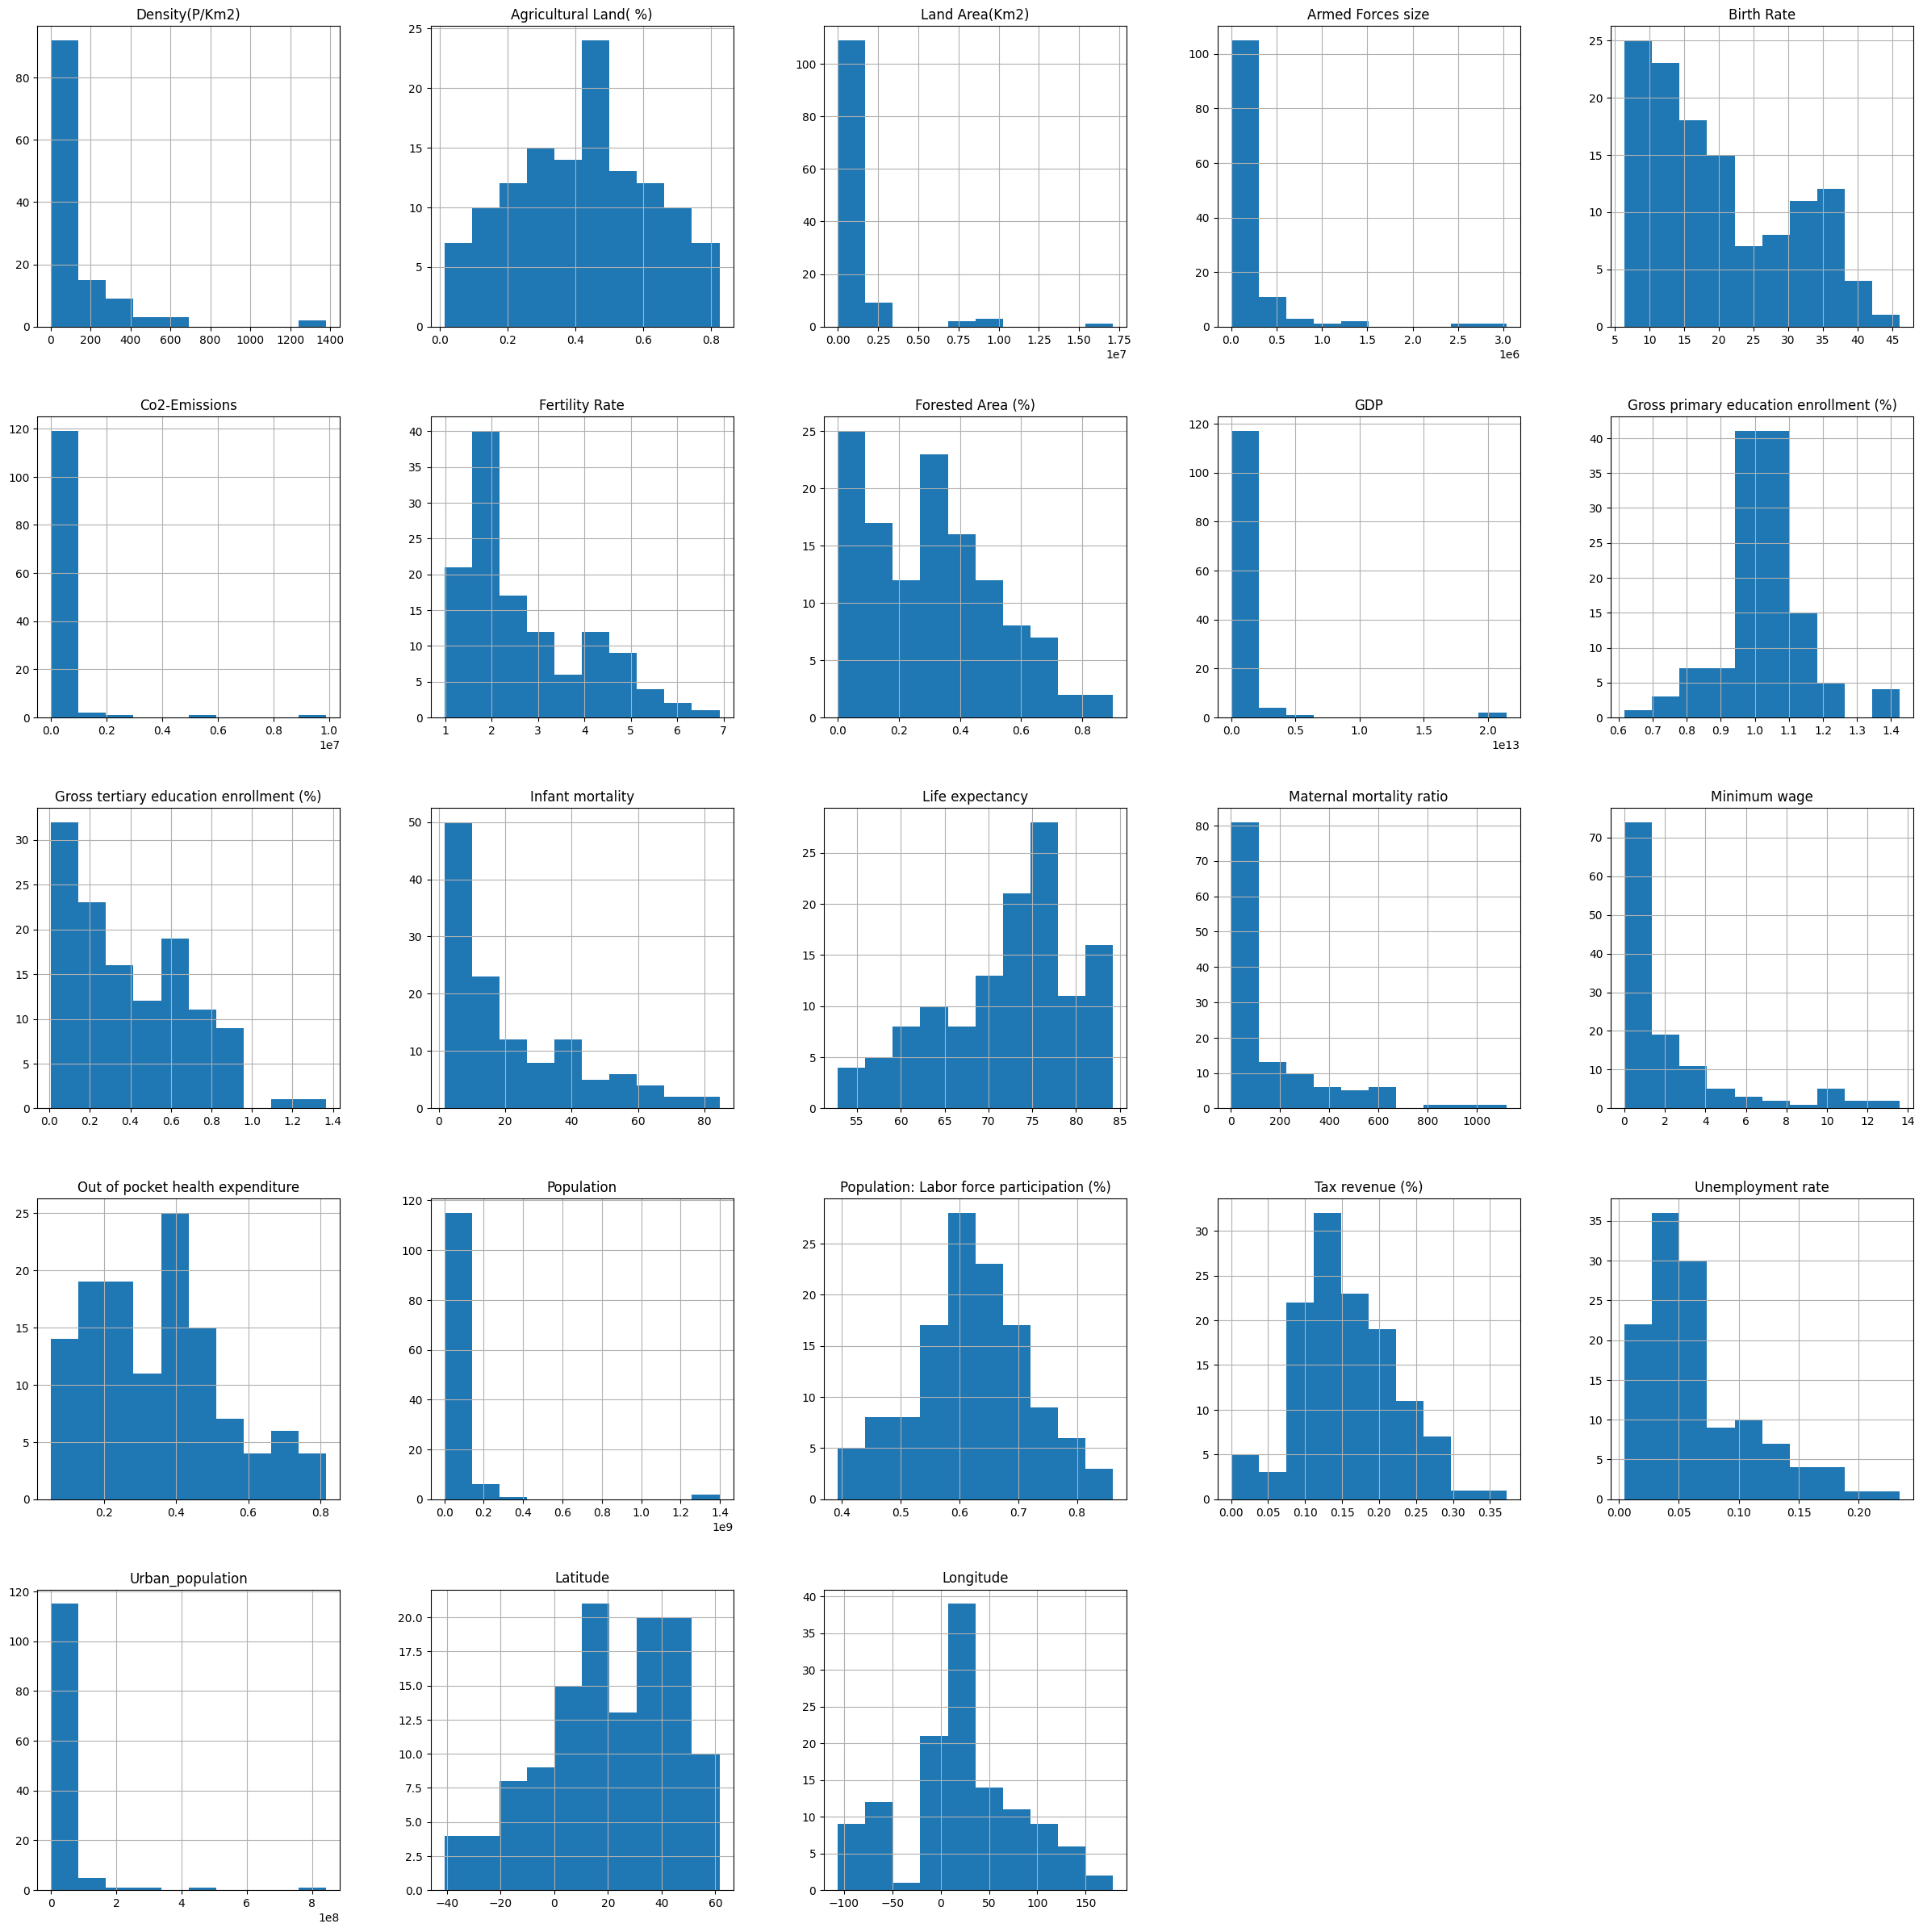

In [18]:
# Produzir histogramas dos dados das colunas
df_limpo.hist(figsize=(30, 30))

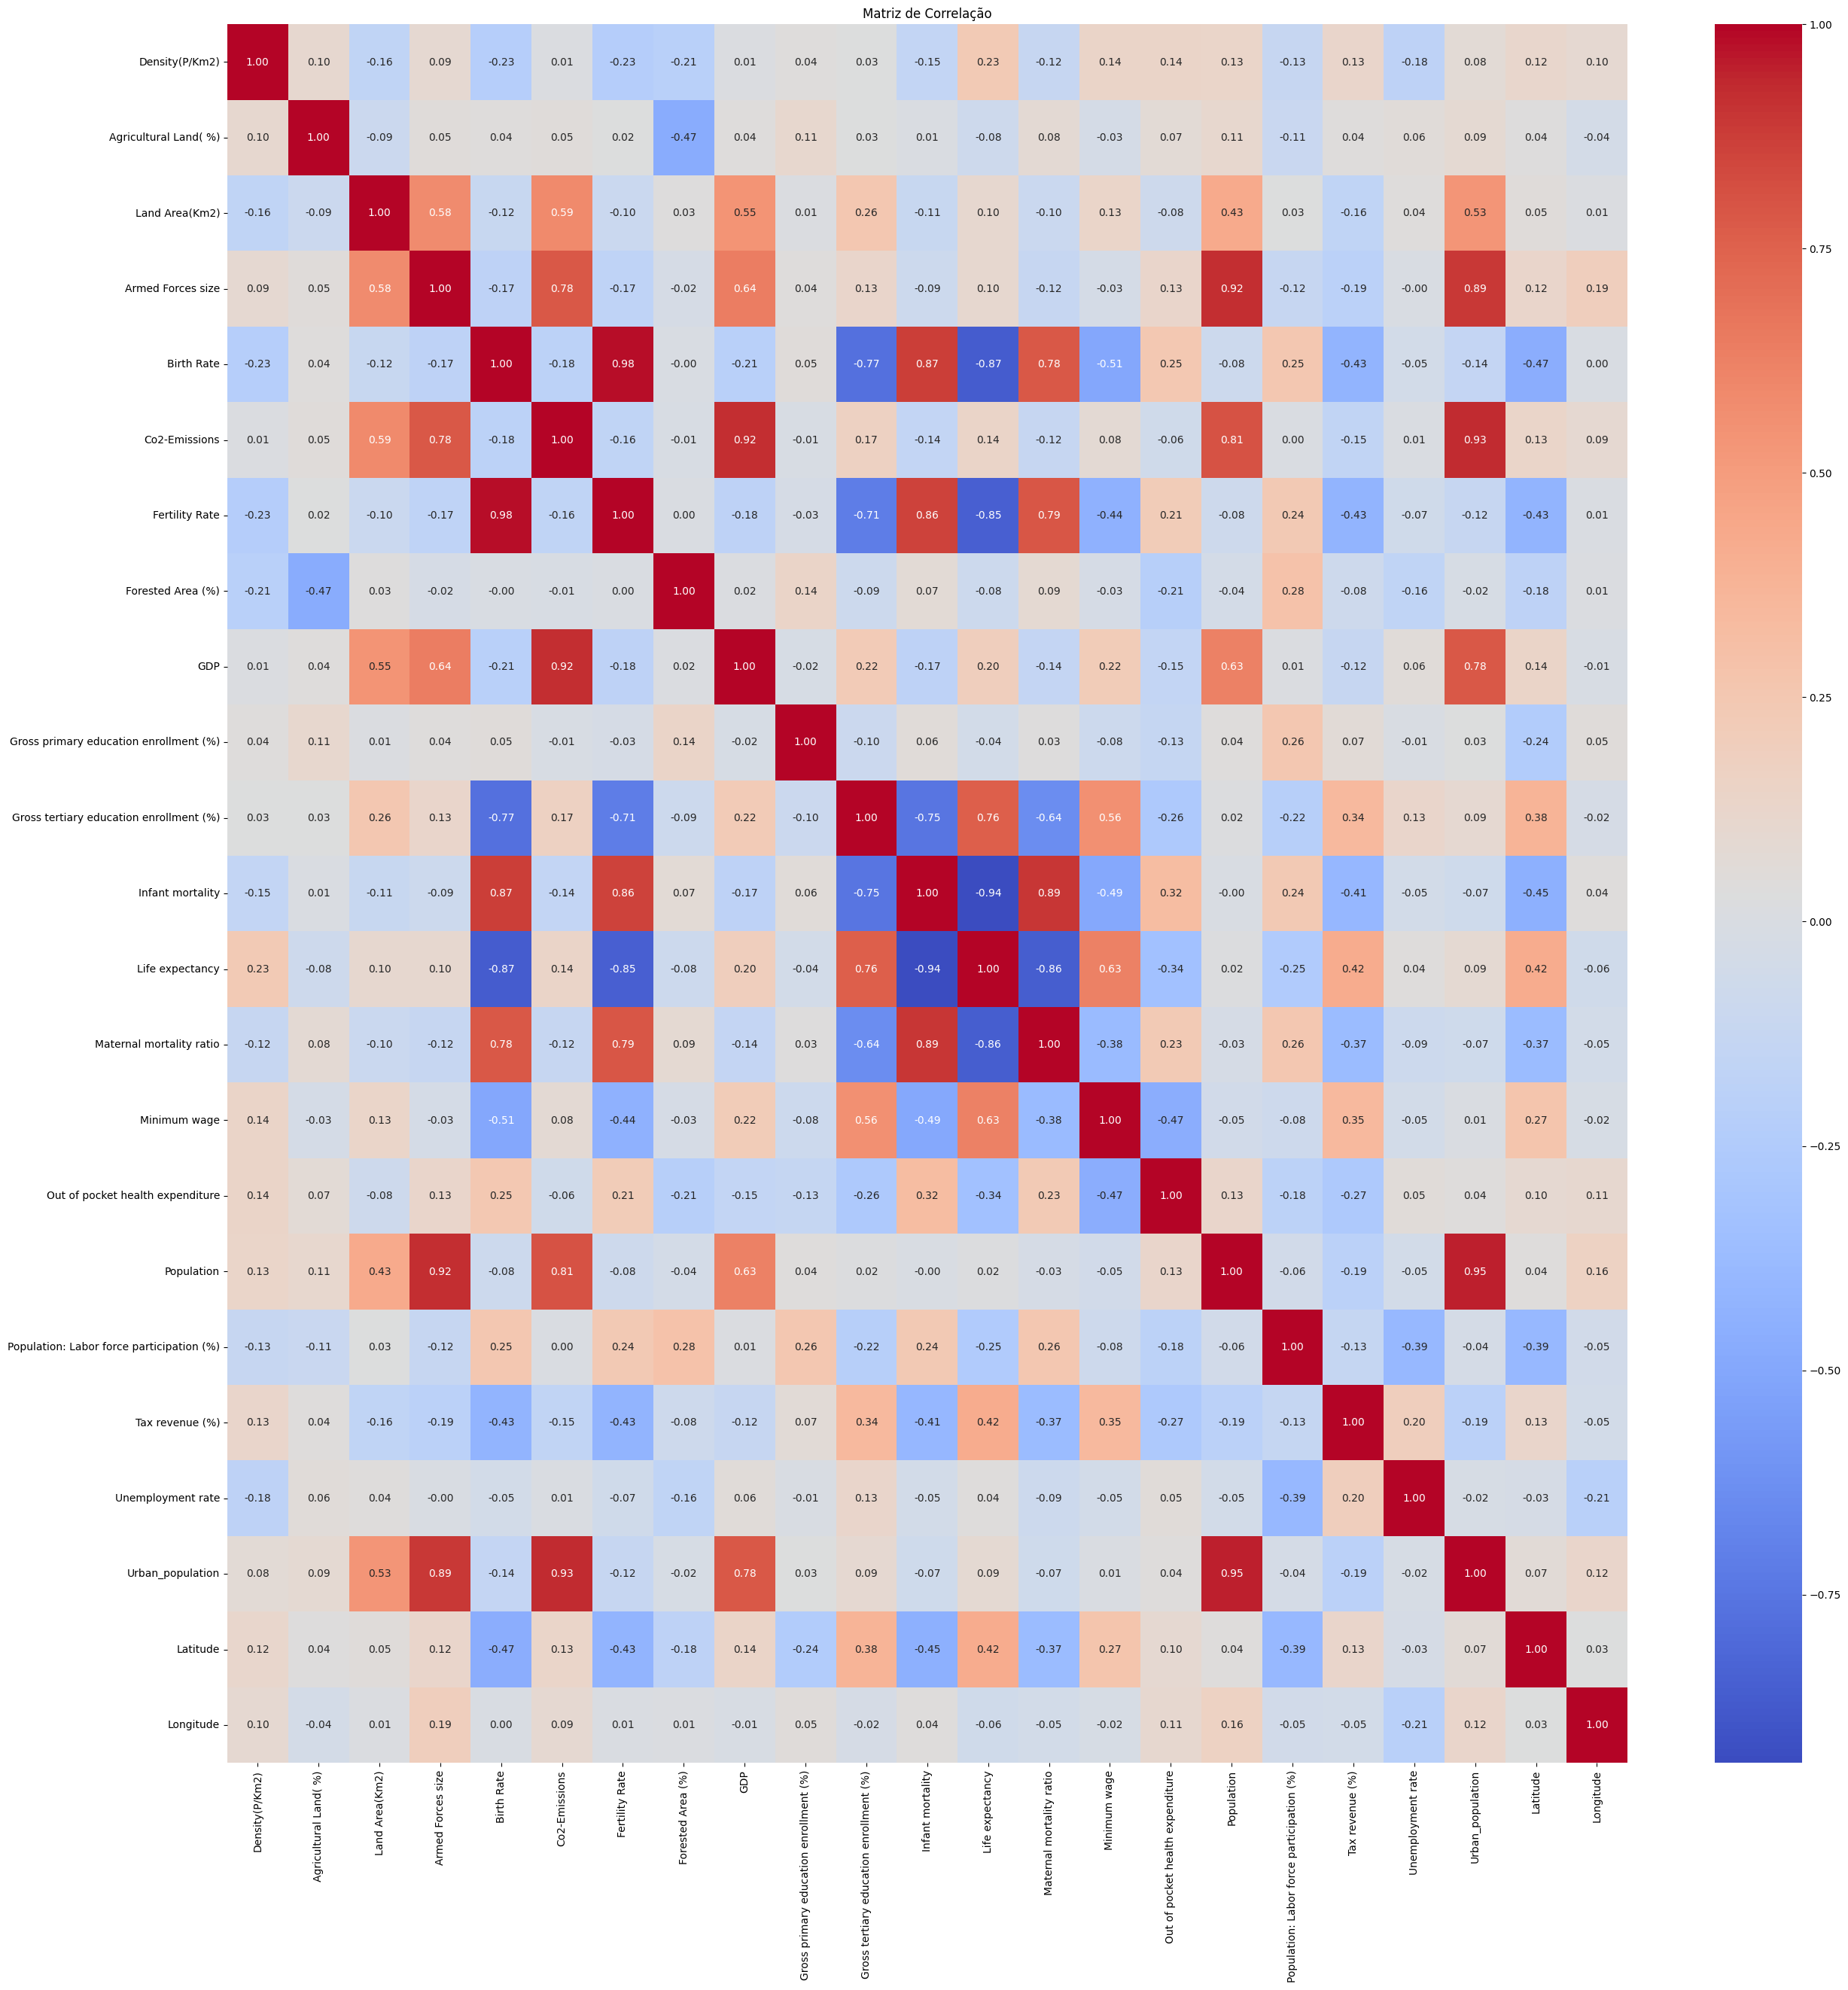

In [19]:
# Matriz correlação das colunas numéricas
so_numero = df_limpo.select_dtypes(include=['int64', 'float'])
matriz_de_correlacao = so_numero.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(matriz_de_correlacao, annot=True, cmap='coolwarm', fmt = ".2f")
plt.title("Matriz de Correlação")
plt.show()

Vamos começar a plotar gráficos com visualização espacial. Para isso, precisamos de um arquivo shapefile, que contém dados geométricos dos países.

In [20]:
# Obter caminho do geodataset do mundo
path = gplt.datasets.get_path("world")

# Importar esse geodataset
blank_world = gpd.read_file(path)

# Verificar importação
blank_world.head()


id                  name  \
0  AFG           Afghanistan   
1  AGO                Angola   
2  ALB               Albania   
3  ARE  United Arab Emirates   
4  ARG             Argentina   

                                            geometry  
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...  
1  MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...  
2  POLYGON ((20.59025 41.85540, 20.46317 41.51509...  
3  POLYGON ((51.57952 24.24550, 51.75744 24.29407...  
4  MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...

Para conseguir visualizar os dados em um mapa, temos que juntar o dataset inicial com o geodataset que obtivemos pelo shapefile.

In [21]:
# Realizar o merge do dataset com o geodataset a partir do nome dos países
merge_dataset_shapefile = blank_world.merge(df_limpo, left_on="name", right_on="Country")

# Verificar se deu certo
merge_dataset_shapefile.head()

id         name                                           geometry  \
0  AFG  Afghanistan  POLYGON ((61.21082 35.65007, 62.23065 35.27066...   
1  AGO       Angola  MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...   
2  ALB      Albania  POLYGON ((20.59025 41.85540, 20.46317 41.51509...   
3  ARG    Argentina  MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...   
4  ARM      Armenia  POLYGON ((43.58275 41.09214, 44.97248 41.24813...   

       Country  Density(P/Km2)  Agricultural Land( %)  Land Area(Km2)  \
0  Afghanistan            60.0                  0.581        652230.0   
1       Angola            26.0                  0.475       1246700.0   
2      Albania           105.0                  0.431         28748.0   
3    Argentina            17.0                  0.543       2780400.0   
4      Armenia           104.0                  0.589         29743.0   

   Armed Forces size  Birth Rate  Co2-Emissions  Fertility Rate  \
0           323000.0       32.49         8672.0            4.47   
1           117000.0       40.73        34693.0            5.52   
2             9000.0       11.78         4536.0            1.62   
3           105000.0       17.02       201348.0            2.26   
4            49000.0       13.99         5156.0            1.76   

   Forested Area (%)           GDP  Gross primary education enrollment (%)  \
0              0.021  1.910135e+10                                   1.040   
1              0.463  9.463542e+10                                   1.135   
2              0.281  1.527808e+10                                   1.070   
3              0.098  4.496634e+11                                   1.097   
4              0.117  1.367280e+10                                   0.927   

   Gross tertiary education enrollment (%)  Infant mortality  Life expectancy  \
0                                    0.097              47.9             64.5   
1                                    0.093              51.6             60.8   
2                                    0.550               7.8             78.5   
3                                    0.900               8.8             76.5   
4                                    0.546              11.0             74.9   

   Maternal mortality ratio  Minimum wage  Out of pocket health expenditure  \
0                     638.0          0.43                             0.784   
1                     241.0          0.71                             0.334   
2                      15.0          1.12                             0.569   
3                      39.0          3.35                             0.176   
4                      26.0          0.66                             0.816   

   Population  Population: Labor force participation (%)  Tax revenue (%)  \
0  38041754.0                                      0.489            0.093   
1  31825295.0                                      0.775            0.092   
2   2854191.0                                      0.557            0.186   
3  44938712.0                                      0.613            0.101   
4   2957731.0                                      0.556            0.209   

   Unemployment rate  Urban_population   Latitude  Longitude  
0             0.1112         9797273.0  33.939110  67.709953  
1             0.0689        21061025.0 -11.202692  17.873887  
2             0.1233         1747593.0  41.153332  20.168331  
3             0.0979        41339571.0 -38.416097 -63.616672  
4             0.1699         1869848.0  40.069099  45.038189

<Axes: >

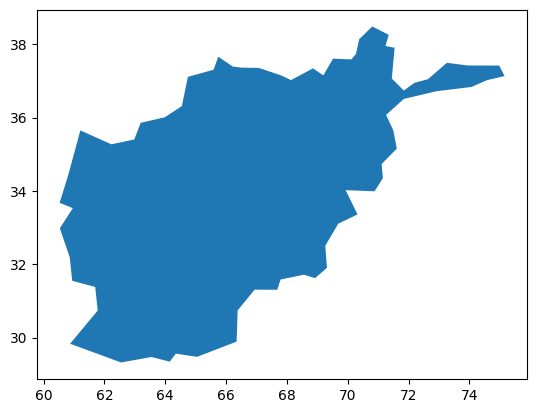

In [22]:
# Testar plotar um país
merge_dataset_shapefile[merge_dataset_shapefile.name=="Afghanistan"].plot()

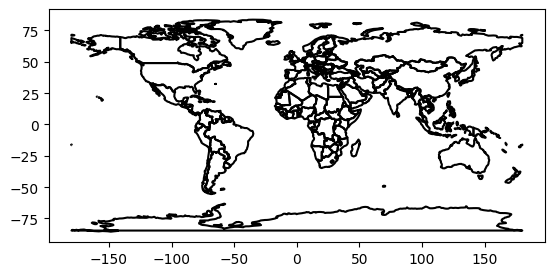

In [23]:
# Testar com o mundo
ax = blank_world.boundary.plot(color = "black")

Vamos buscar relações entre as colunas Econômicas e o PIB.

<Figure size 1200x800 with 0 Axes>

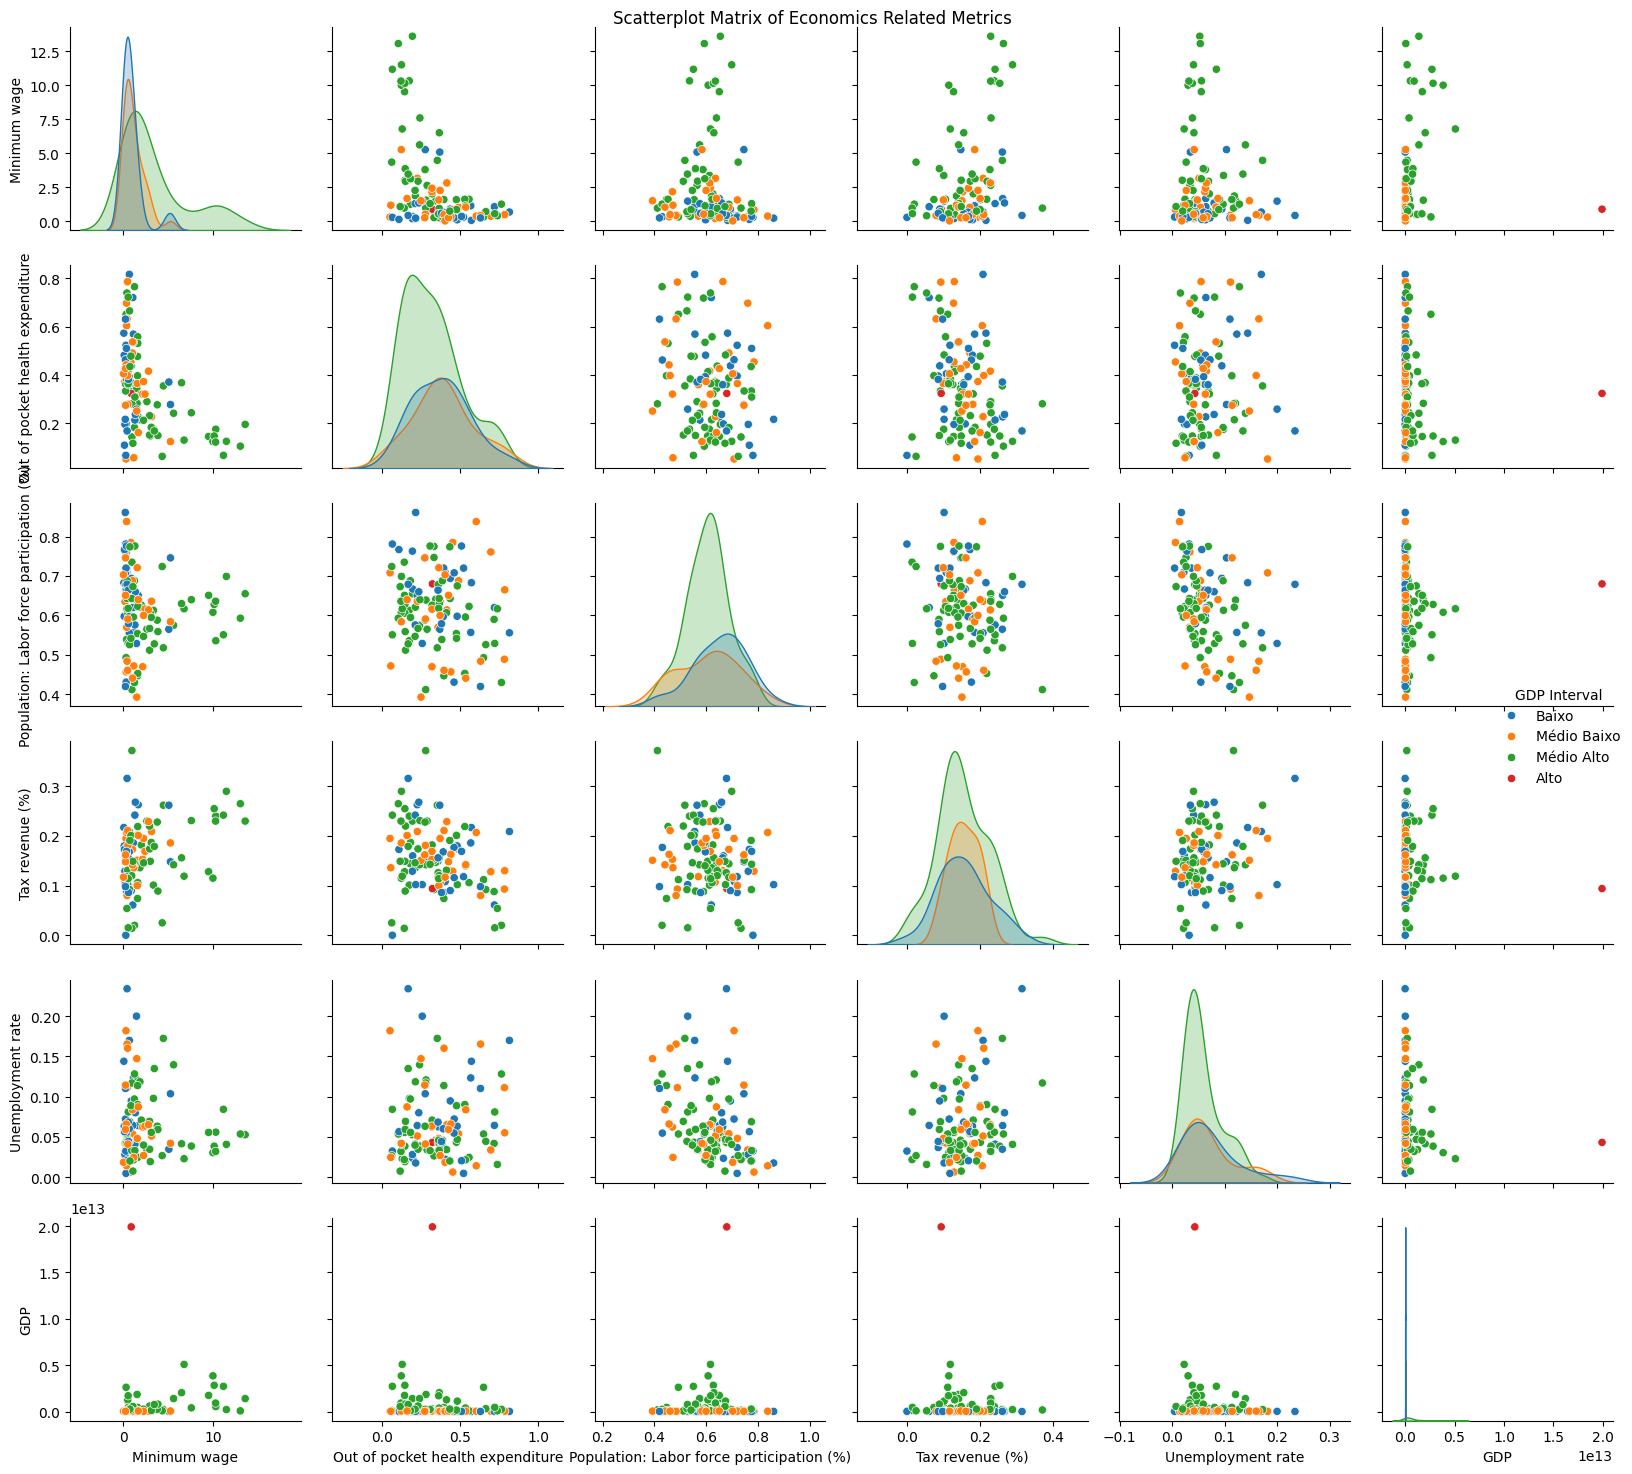

In [24]:
# Vamos definir intervalos baseados nos quartis obtidos com .describe()

intervalos = ['Baixo', 'Médio Baixo', 'Médio Alto', 'Alto']

# Especificar os pontos de corte para os intervalos
cut_bins = [merge_dataset_shapefile['GDP'].min(), 1.795852e+10, 6.041555e+10, 1.990000e+13, merge_dataset_shapefile['GDP'].max()]

# Aplicar o corte aos dados da coluna 'GDP'
merge_dataset_shapefile['GDP Interval'] = pd.cut(merge_dataset_shapefile['GDP'], bins=cut_bins, labels=intervalos)

# Separar colunas relacionadas à economia
Economics = ['Minimum wage', 'Out of pocket health expenditure', 'Population: Labor force participation (%)', 
             'Tax revenue (%)', 'Unemployment rate', 'GDP', 'GDP Interval']

# Definir tamanho do gráfico
plt.figure(figsize=(12,8))

# Plotar um pairplot dos fatores econômicos e os visualizar com base nos intervalos de PIB
sns.pairplot(merge_dataset_shapefile[Economics], hue = 'GDP Interval')
plt.suptitle('Scatterplot Matrix of Economics Related Metrics')
plt.tight_layout()
plt.show()

Percebe-se que o PIB máximo é um outlier em quase todas as métricas e pode estar influênciando toda a análise, portanto, vamos desconsiderá-lo antes de prosseguir.

In [25]:
max = merge_dataset_shapefile['GDP'].max()

max_row = merge_dataset_shapefile[merge_dataset_shapefile['GDP'] == max]

print(max_row)

     id   name                                           geometry Country  \
21  CHN  China  MULTIPOLYGON (((110.33919 18.67839, 109.47521 ...   China   

    Density(P/Km2)  Agricultural Land( %)  Land Area(Km2)  Armed Forces size  \
21           153.0                  0.562       9596960.0          2695000.0   

    Birth Rate  Co2-Emissions  Fertility Rate  Forested Area (%)  \
21        10.9      9893038.0            1.69              0.224   

             GDP  Gross primary education enrollment (%)  \
21  1.991000e+13                                   1.002   

    Gross tertiary education enrollment (%)  Infant mortality  \
21                                    0.506               7.4   

    Life expectancy  Maternal mortality ratio  Minimum wage  \
21             77.0                      29.0          0.87   

    Out of pocket health expenditure    Population  \
21                             0.324  1.397715e+09   

    Population: Labor force participation (%)  Tax revenue 

Esse Outlier é a China. Vamos excluí-la dos dados

In [26]:
merge_dataset_shapefile_no_outliers = merge_dataset_shapefile[merge_dataset_shapefile['name']!="China"]

In [27]:
merge_dataset_shapefile_no_outliers.count()

id                                           114
name                                         114
geometry                                     114
Country                                      114
Density(P/Km2)                               114
Agricultural Land( %)                        114
Land Area(Km2)                               114
Armed Forces size                            114
Birth Rate                                   114
Co2-Emissions                                114
Fertility Rate                               114
Forested Area (%)                            114
GDP                                          114
Gross primary education enrollment (%)       114
Gross tertiary education enrollment (%)      114
Infant mortality                             114
Life expectancy                              114
Maternal mortality ratio                     114
Minimum wage                                 114
Out of pocket health expenditure             114
Population          

In [28]:
merge_dataset_shapefile_no_outliers['GDP'].describe()

count    1.140000e+02
mean     3.732320e+11
std      7.988535e+11
min      1.673540e+09
25%      1.756840e+10
50%      5.960388e+10
75%      2.772189e+11
max      5.081770e+12
Name: GDP, dtype: float64

In [29]:
merge_dataset_shapefile_no_outliers['GDP'].hist()

<Axes: >

In [30]:
geodataset_limpo = merge_dataset_shapefile_no_outliers.dropna()

In [31]:
geodataset_limpo.count()

id                                           113
name                                         113
geometry                                     113
Country                                      113
Density(P/Km2)                               113
Agricultural Land( %)                        113
Land Area(Km2)                               113
Armed Forces size                            113
Birth Rate                                   113
Co2-Emissions                                113
Fertility Rate                               113
Forested Area (%)                            113
GDP                                          113
Gross primary education enrollment (%)       113
Gross tertiary education enrollment (%)      113
Infant mortality                             113
Life expectancy                              113
Maternal mortality ratio                     113
Minimum wage                                 113
Out of pocket health expenditure             113
Population          

In [32]:
intervalos = ['Baixo', 'Médio Baixo', 'Médio Alto', 'Alto']
# Especificar os pontos de corte para os intervalos
cut_bins = [geodataset_limpo['GDP'].min(), 1.900182e+10, 7.110492e+10, 3.141014e+11, geodataset_limpo['GDP'].max()]

# Aplicar o corte aos dados da coluna 'GDP'
geodataset_limpo['GDP Interval'] = pd.cut(geodataset_limpo['GDP'], bins=cut_bins, labels=intervalos)

C:\Users\018118631\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Figure size 1200x800 with 0 Axes>

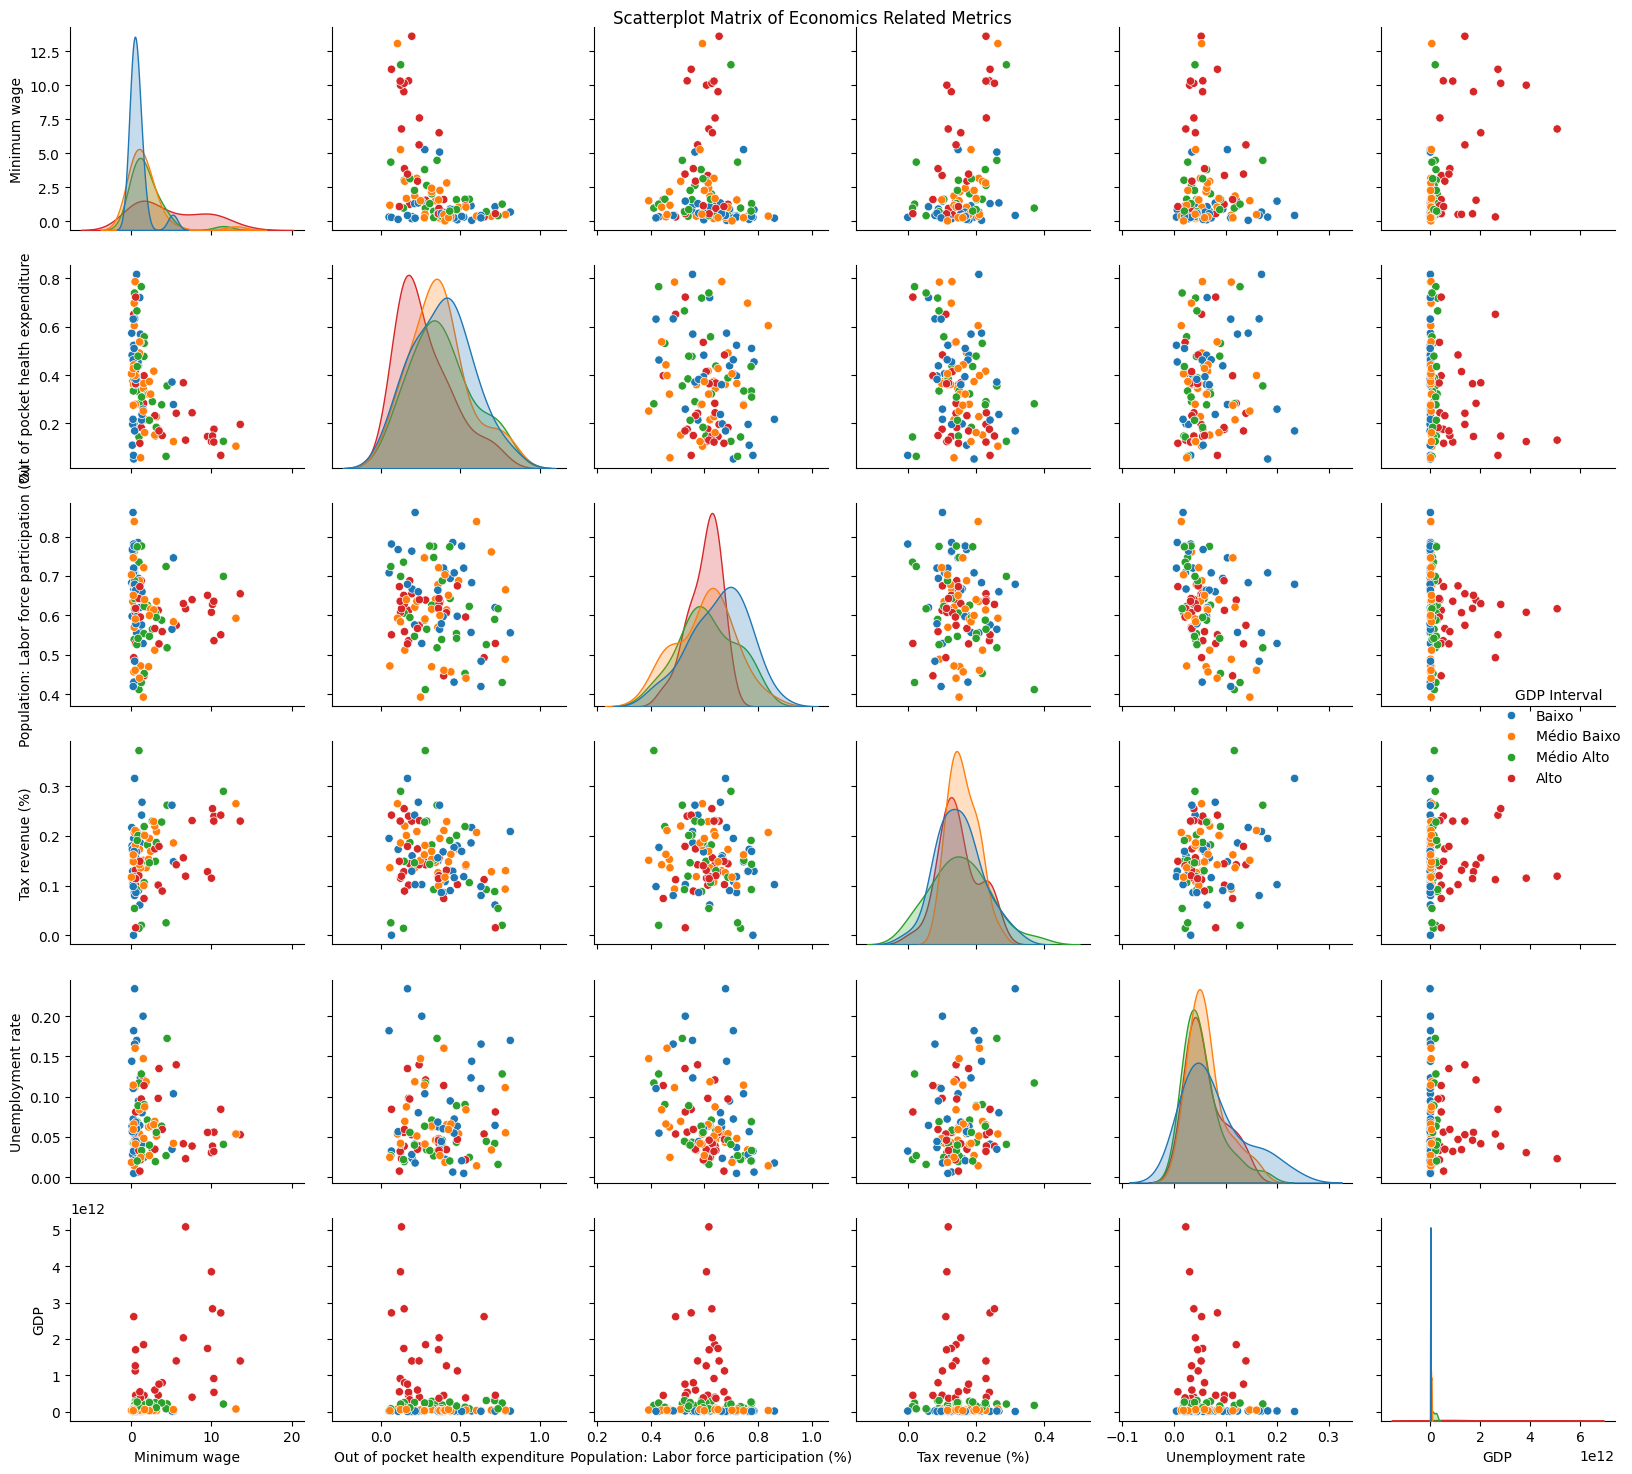

In [33]:
Economics = ['Minimum wage', 'Out of pocket health expenditure', 'Population: Labor force participation (%)', 
             'Tax revenue (%)', 'Unemployment rate', 'GDP', 'GDP Interval']

plt.figure(figsize=(12,8))
sns.pairplot(geodataset_limpo[Economics], hue = 'GDP Interval')
plt.suptitle('Scatterplot Matrix of Economics Related Metrics')
plt.tight_layout()
plt.show()

Agora os gráficos ficaram mais variados e com maior vizualização

Percebe-se que os países com maior PIB, também tem maiores taxas de desemprego, maiores salários mínimos, maior taxação e, surpreendentemente, maior gasto individual com saúde.

Agora, faremos o mesmo para fatores geográficos

<Figure size 3000x3000 with 0 Axes>

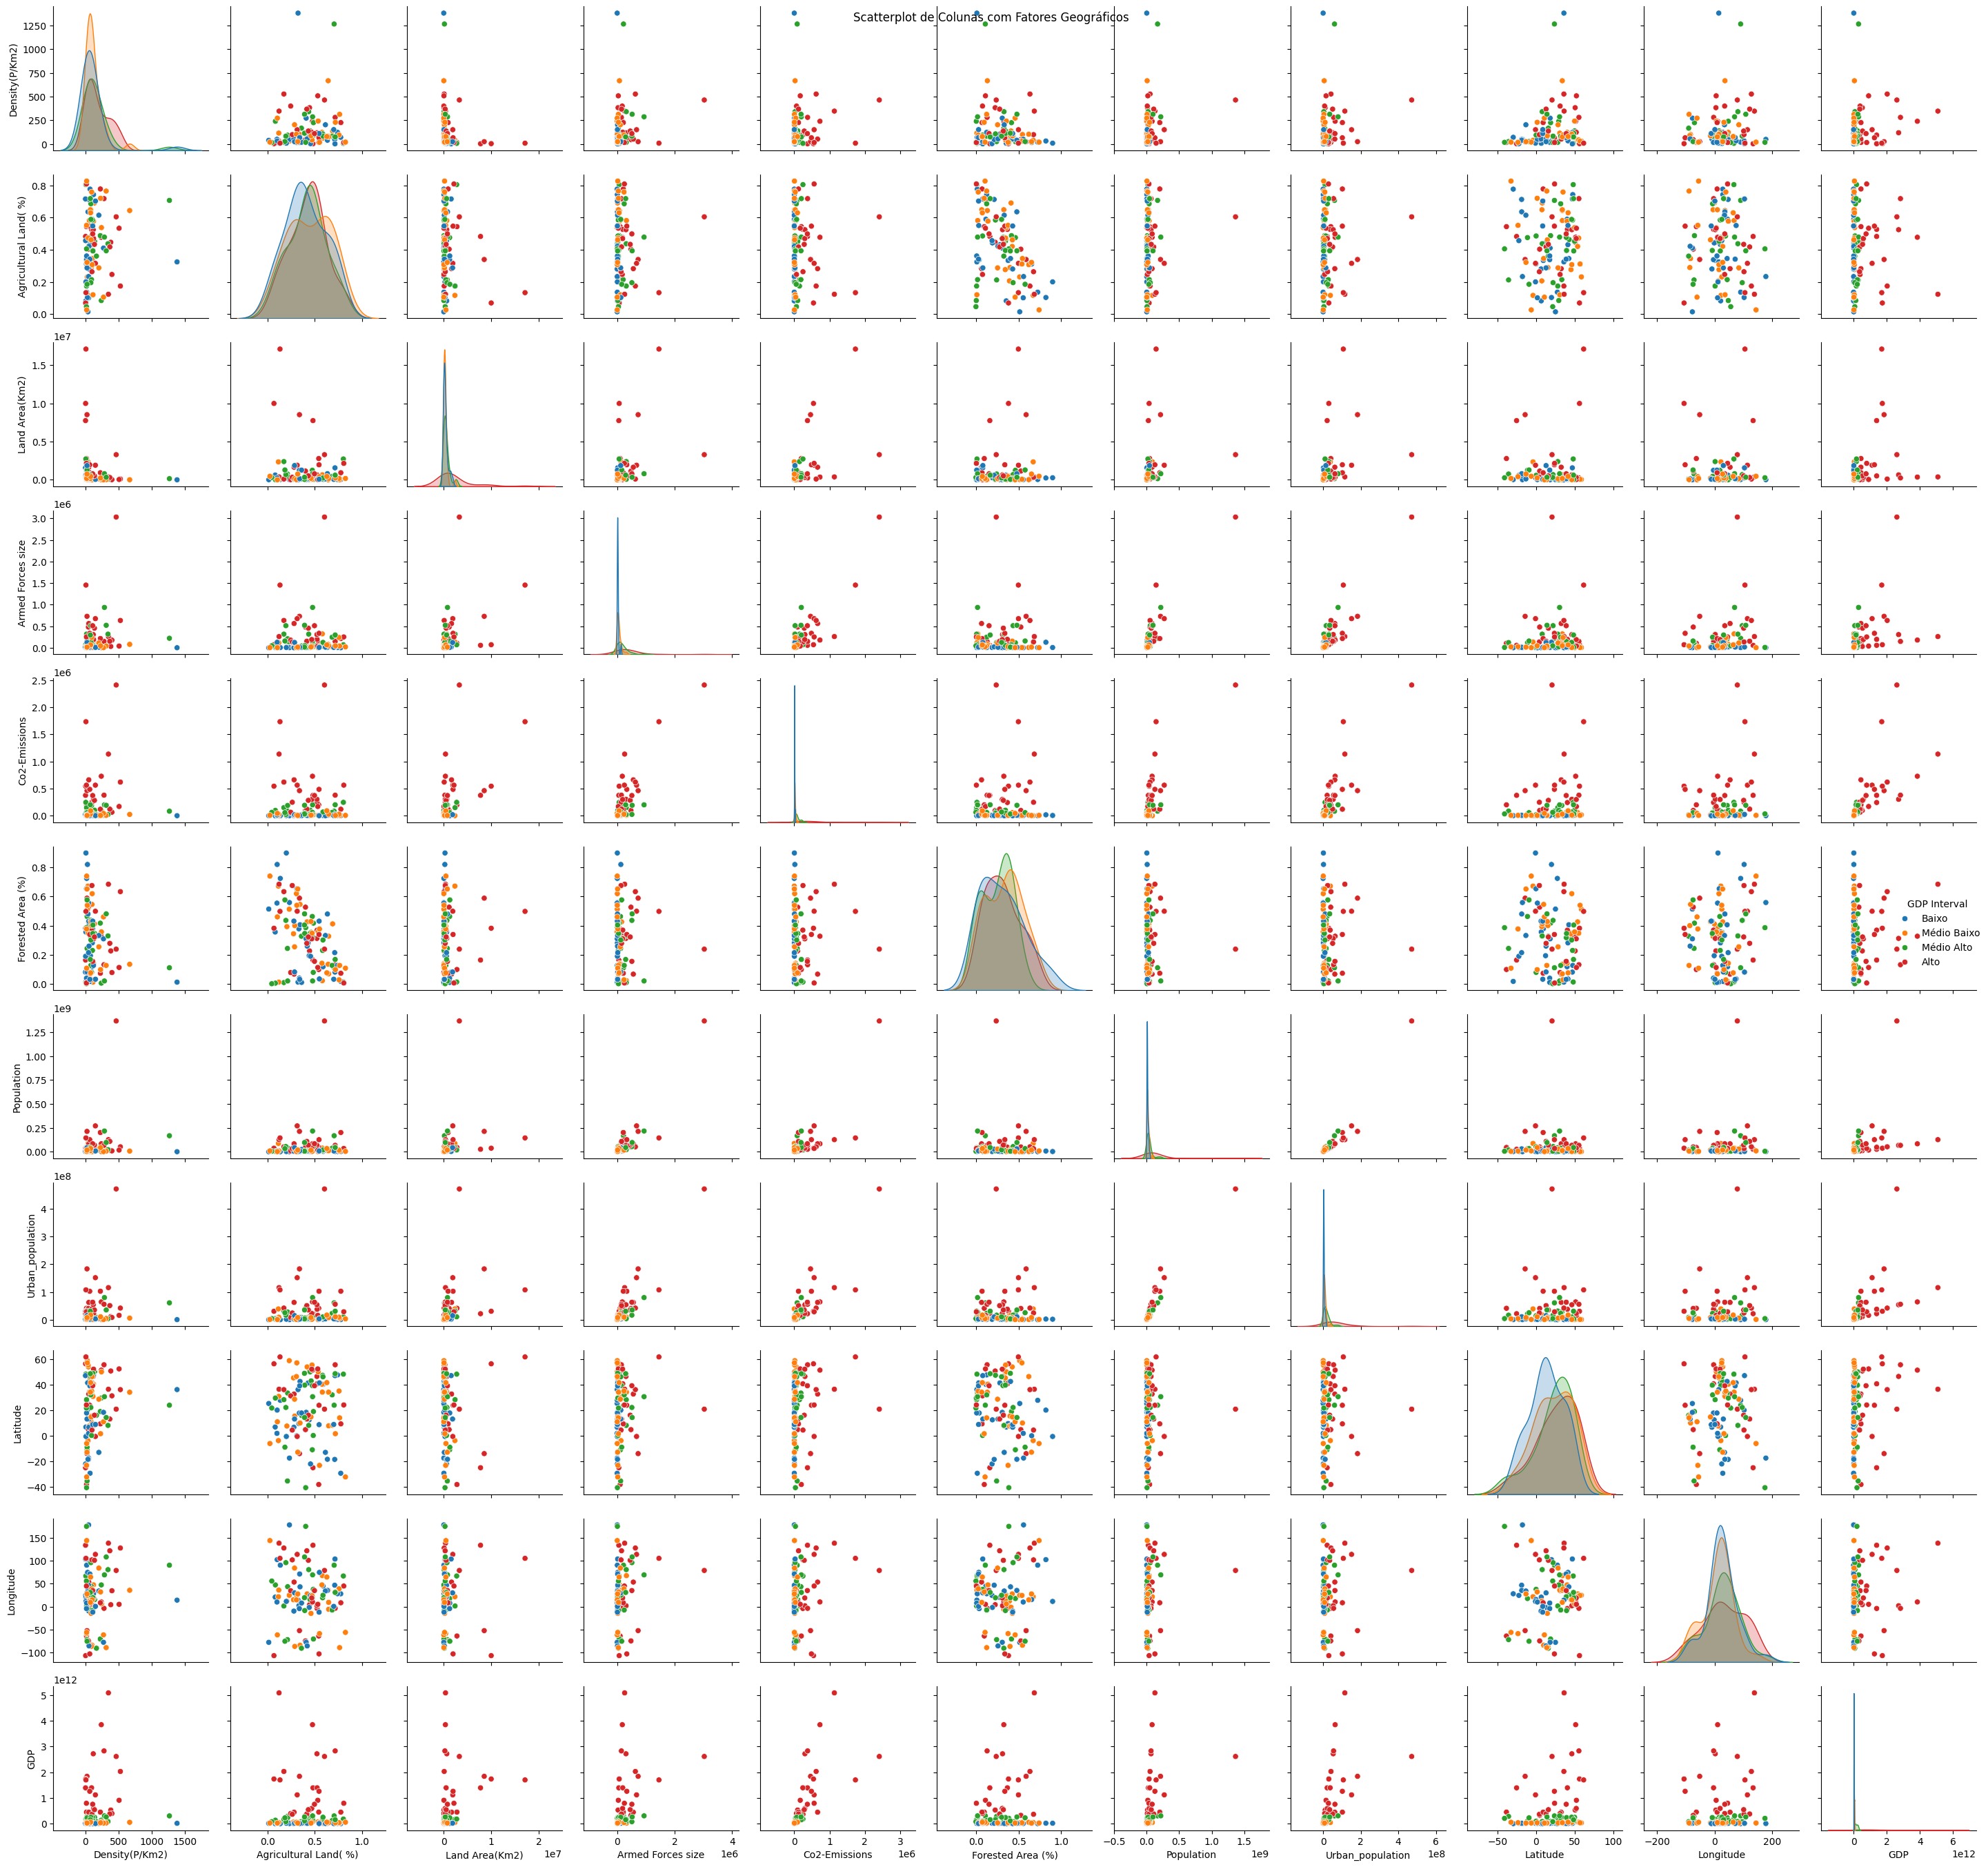

In [34]:
Geography = ['Density(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size',
             'Co2-Emissions', 'Forested Area (%)', 'Population', 'Urban_population', 'Latitude', 
             'Longitude', 'GDP', 'GDP Interval']

plt.figure(figsize=(30,30))
sns.pairplot(geodataset_limpo[Geography], hue = 'GDP Interval')
plt.suptitle('Scatterplot de Colunas com Fatores Geográficos')
plt.tight_layout()
plt.show()

Esses gráficos nos dizem que:

São os que tem maiores áreas, emitem mais CO2, são mais e tem maiores exércitos

Além disso, não são os mais densos.

Por fim, repetiremos o processo para as colunas de cunho social

In [35]:
Social = ['Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 
          'Birth Rate', 'Fertility Rate', 'Infant mortality', 'Life expectancy', 'Maternal mortality ratio', 
          'GDP', 'GDP Interval']

plt.figure(figsize=(20,12))
sns.pairplot(geodataset_limpo[Social], hue = 'GDP Interval')
plt.suptitle('Scatterplot de Colunas com Fatores Geográficos')
plt.tight_layout()
plt.show()

<Figure size 2000x1200 with 0 Axes>

Vemos que nos países com PIB mais altos os matriculados no ensino primário se concentram em torno de 1, o que pode significar que existem poucos repetentes e alunos mais velhos matriculados nesses cursos.

Já o valor dos matriculados no ensino superior, é mais variado.

A taxa de fertilidade dos países mais ricos também está menor que 2.5 em sua maioria, porém a taxa de mortalidade infantil também é muito baixa.

Me chama atenção o gráfico de expectativa de vida, devido à países ricos com taxas menores.

In [37]:
#Vamos criar uma representação do PIB dos países

# Plotar o primeiro GeoDataFrame do mundo vazio
ax = blank_world.boundary.plot(color = "black", cmap = 'viridis', linewidth=0.5, figsize = (20, 20), alpha=1.0)

# Plotar o segundo GeoDataFrame sobre o mesmo subplot
geodataset_limpo.plot(ax=ax, 
                             column = "GDP", 
                             scheme = "fisher_jenks",
                             #k = 10,
                             cmap = "viridis",
                             legend = True
                             )

plt.title("Distribuição do PIB dos países")
# Exibir o gráfico
plt.show()

In [38]:
# Criar uma grade de subplots com 1 linha e 2 colunas
fig, axs = plt.subplots(2, 1, figsize=(20, 20))

# Plotar o primeiro GeoDataFrame no primeiro subplot
blank_world.boundary.plot(ax=axs[0], color="black", linewidth=0.5, alpha=1.0)
geodataset_limpo.plot(ax=axs[0], column="Population", scheme="fisher_jenks", cmap="viridis", legend=True)

# Adicionar título ao subplot
axs[0].set_title("População")

# Plotar o segundo GeoDataFrame no segundo subplot
blank_world.boundary.plot(ax=axs[1], color="black", linewidth=0.5, alpha=1.0)
geodataset_limpo.plot(ax=axs[1], column="Density(P/Km2)", scheme="quantiles", cmap="viridis", legend=True)

# Adicionar título ao subplot
axs[1].set_title("Densidade (P/Km2)")

# Exibir o gráfico
plt.show()


País Populoso != País Denso

In [39]:
import matplotlib.pyplot as plt

# Criar uma grade de subplots com 1 linha e 2 colunas
fig, axs = plt.subplots(2, 1, figsize=(20, 20))

# Plotar o primeiro GeoDataFrame no primeiro subplot
blank_world.boundary.plot(ax=axs[0], color="black", linewidth=0.5, alpha=1.0)
geodataset_limpo.plot(ax=axs[0], column="Agricultural Land( %)", scheme="fisher_jenks", cmap="viridis", legend=True)

# Adicionar título ao subplot
axs[0].set_title("Terras voltadas à agricultura")

# Plotar o segundo GeoDataFrame no segundo subplot
blank_world.boundary.plot(ax=axs[1], color="black", linewidth=0.5, alpha=1.0)
geodataset_limpo.plot(ax=axs[1], column="GDP", scheme="fisher_jenks", cmap="viridis", legend=True)

# Adicionar título ao subplot
axs[1].set_title("PIB")

# Exibir o gráfico
plt.show()


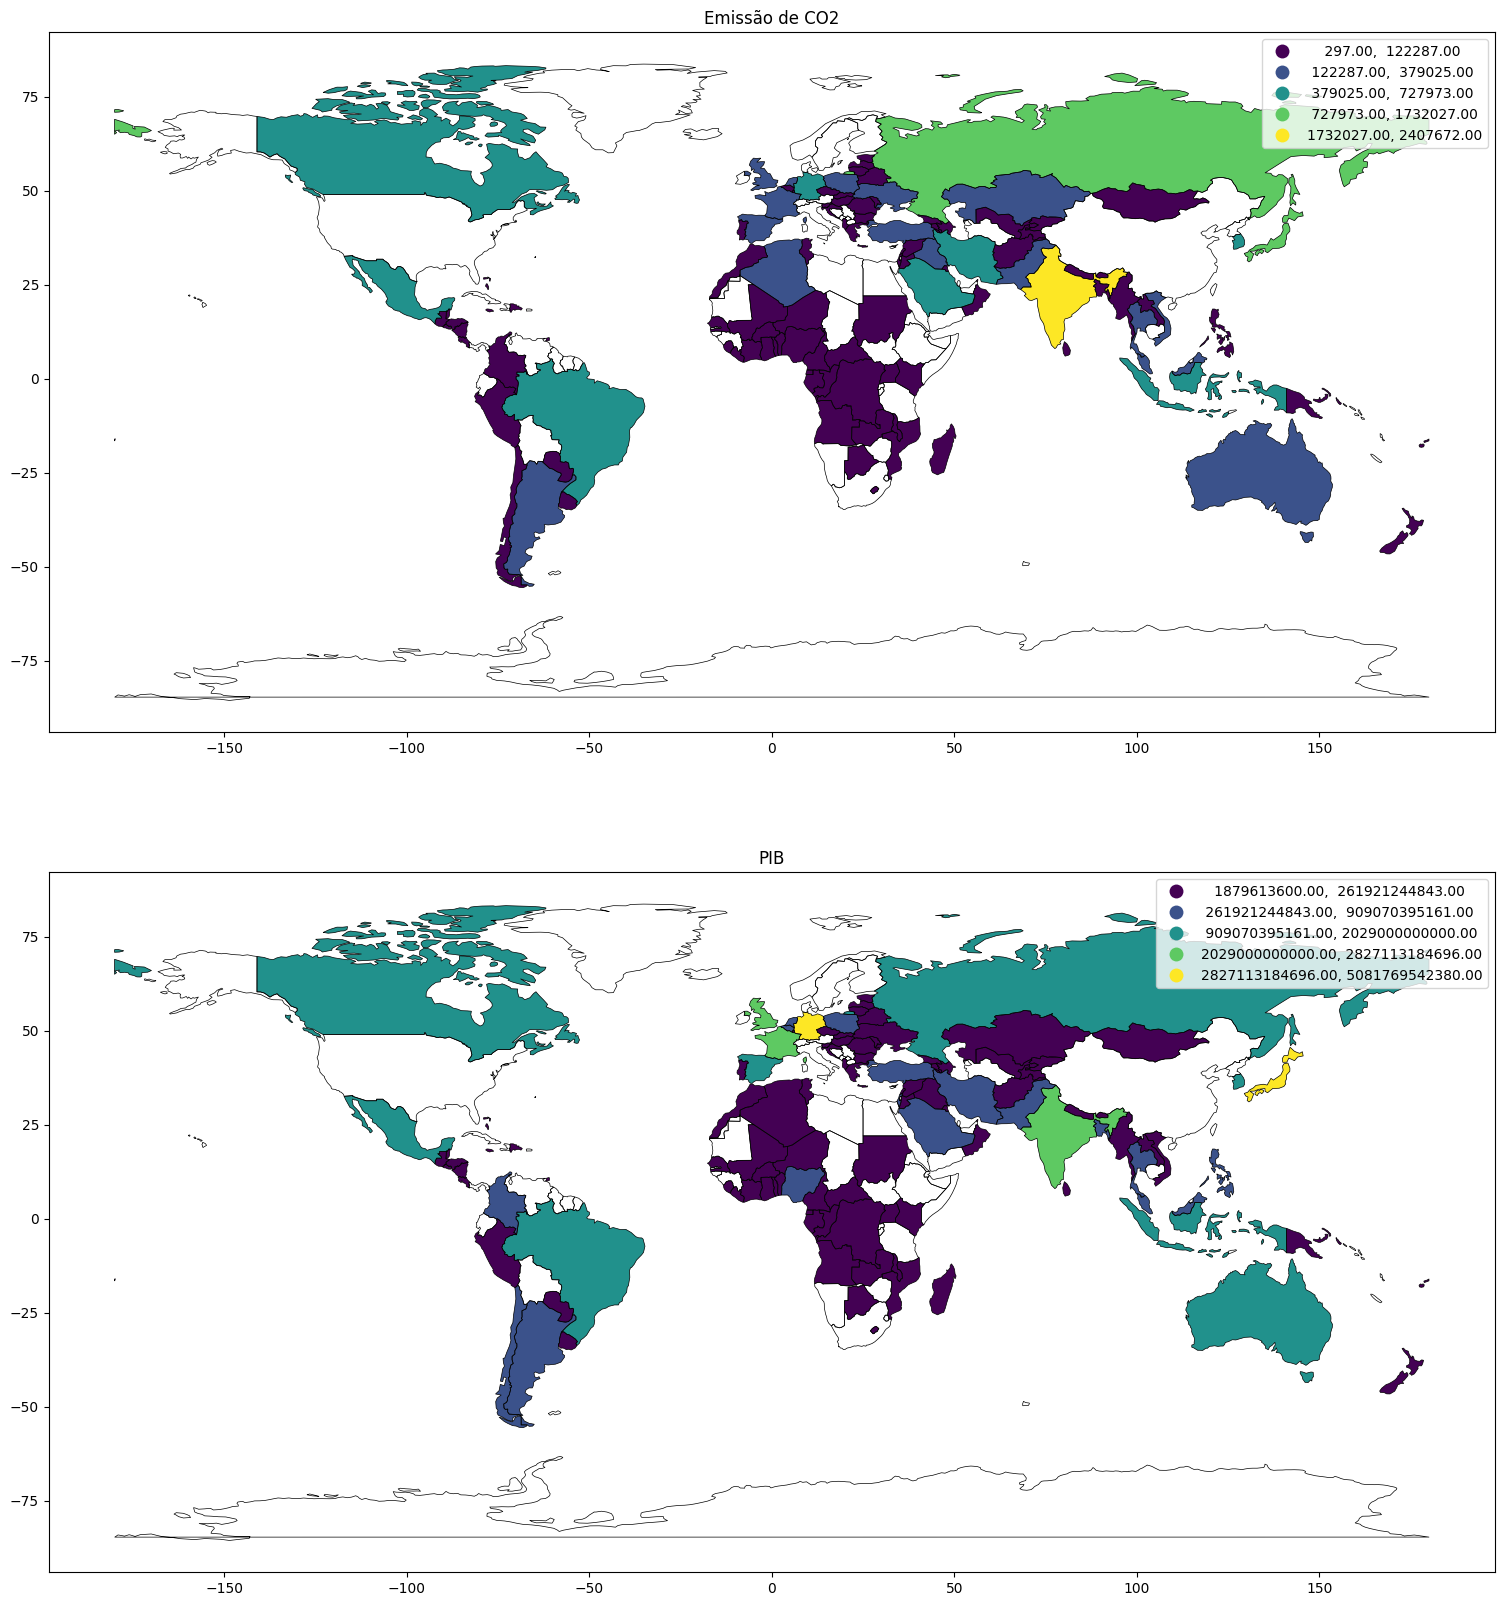

In [40]:
import matplotlib.pyplot as plt

# Criar uma grade de subplots com 1 linha e 2 colunas
fig, axs = plt.subplots(2, 1, figsize=(20, 20))

# Plotar o primeiro GeoDataFrame no primeiro subplot
blank_world.boundary.plot(ax=axs[0], color="black", linewidth=0.5, alpha=1.0)
geodataset_limpo.plot(ax=axs[0], column="Co2-Emissions", scheme="fisher_jenks", cmap="viridis", legend=True)

# Adicionar título ao subplot
axs[0].set_title("Emissão de CO2")

# Plotar o segundo GeoDataFrame no segundo subplot
blank_world.boundary.plot(ax=axs[1], color="black", linewidth=0.5, alpha=1.0)
geodataset_limpo.plot(ax=axs[1], column="GDP", scheme="fisher_jenks", cmap="viridis", legend=True)

# Adicionar título ao subplot
axs[1].set_title("PIB")

# Exibir o gráfico
plt.show()


Os gráficos são quase idênticos

In [41]:
import matplotlib.pyplot as plt

# Criar uma grade de subplots com 1 linha e 2 colunas
fig, axs = plt.subplots(2, 1, figsize=(20, 20))

# Plotar o primeiro GeoDataFrame no primeiro subplot
blank_world.boundary.plot(ax=axs[0], color="black", linewidth=0.5, alpha=1.0)
geodataset_limpo.plot(ax=axs[0], column="Fertility Rate", scheme="fisher_jenks", cmap="viridis", legend=True)

# Adicionar título ao subplot
axs[0].set_title("Fertilidade")

# Plotar o segundo GeoDataFrame no segundo subplot
blank_world.boundary.plot(ax=axs[1], color="black", linewidth=0.5, alpha=1.0)
geodataset_limpo.plot(ax=axs[1], column="GDP", scheme="fisher_jenks", cmap="viridis", legend=True)

# Adicionar título ao subplot
axs[1].set_title("PIB")

# Exibir o gráfico
plt.show()


Comportamento quase inverso

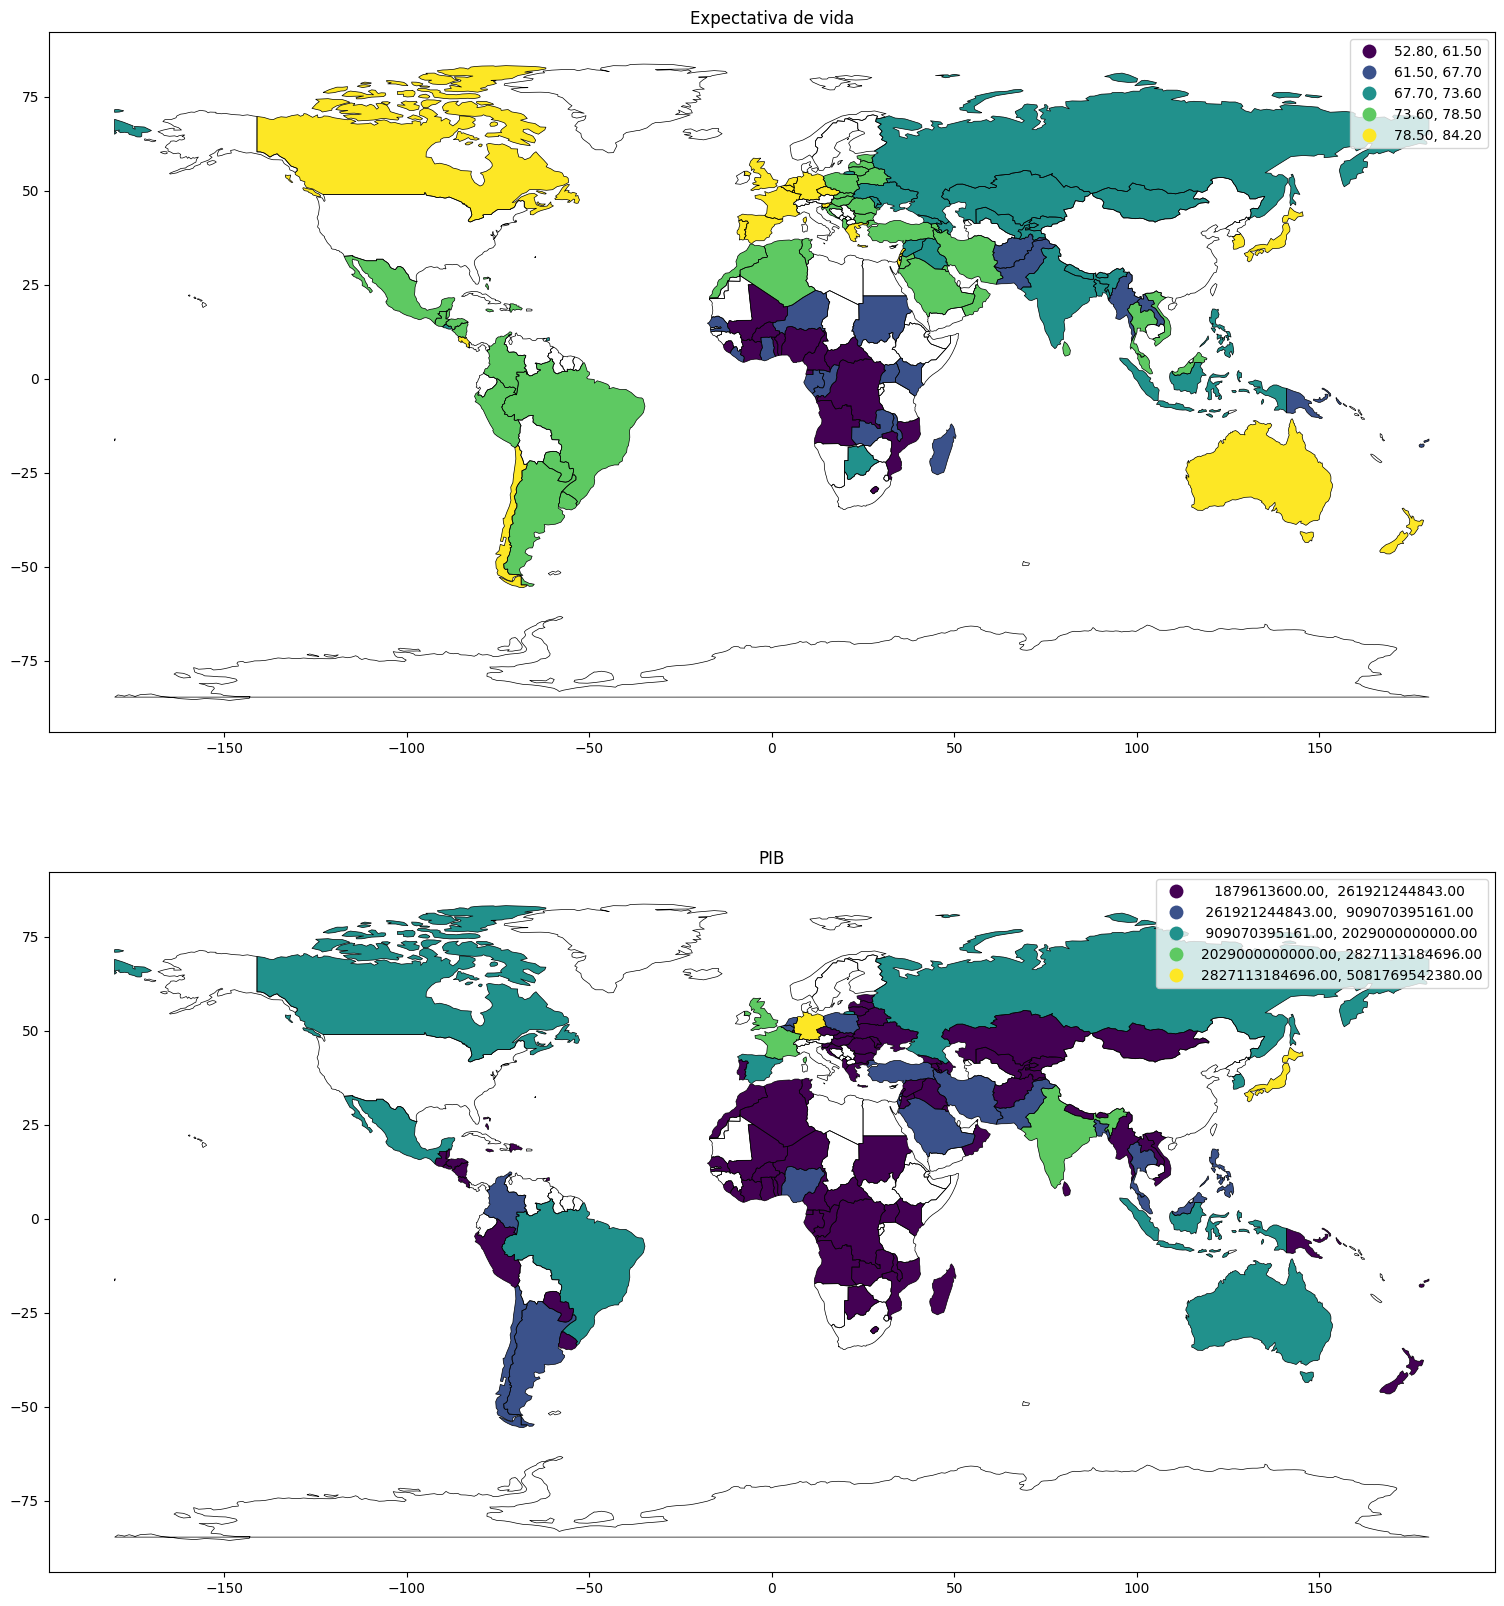

In [43]:
import matplotlib.pyplot as plt

# Criar uma grade de subplots com 1 linha e 2 colunas
fig, axs = plt.subplots(2, 1, figsize=(20, 20))

# Plotar o primeiro GeoDataFrame no primeiro subplot
blank_world.boundary.plot(ax=axs[0], color="black", linewidth=0.5, alpha=1.0)
geodataset_limpo.plot(ax=axs[0], column="Life expectancy", scheme="fisher_jenks", cmap="viridis", legend=True)

# Adicionar título ao subplot
axs[0].set_title("Expectativa de vida")

# Plotar o segundo GeoDataFrame no segundo subplot
blank_world.boundary.plot(ax=axs[1], color="black", linewidth=0.5, alpha=1.0)
geodataset_limpo.plot(ax=axs[1], column="GDP", scheme="fisher_jenks", cmap="viridis", legend=True)

# Adicionar título ao subplot
axs[1].set_title("PIB")

# Exibir o gráfico
plt.show()


O comportamento visto nos scatterplots pode ser explicado pela Índia.